In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")
print(os.getcwd())

/mnt/antares_raid/home/bramantyos/codes/multilang_timescale


In [4]:
import json

import numpy as np

import cortex

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from src.trainer import Trainer
from src.settings import ResultSetting, TrainerSetting

from src.utils import put_values_on_mask, undelay_weights


In [6]:
from src.utils import read_result_meta, get_surface_dict, delete_empty_result, delete_result
from src.plot_utils import (
    plot_prediction_accuracy
)

In [7]:
# plot the pca weights on flatmap
from cortex import VolumeRGB, Volume
from cortex.quickflat import make_figure
from cortex import quickshow

In [8]:
surfaces_json = ".temp/fmri/bling/surfaces.json"
surfaces_dir = "/mnt/raid/bling/share/pycortex_store"

subject_id = "TYE"
result_meta_dir = ".temp/result_meta/bling"

result_metric = "r2"

alpha = 0.05
alpha_pred_acc = None

In [9]:
surface_dict = get_surface_dict(subject_id)

subject_file_en = f".temp/config/bling/subject/{subject_id}_en.json"
subject_file_zh = f".temp/config/bling/subject/{subject_id}_zh.json"

trainer_en_file = (
    f".temp/config/bling/train/stepwise/{subject_id.lower()}_en-save_primal.json"
)
trainer_zh_file = (
    f".temp/config/bling/train/stepwise/{subject_id.lower()}_zh-save_primal.json"
)

feature_file_en = f".temp/config/bling/feature/{subject_id}/fasttext_stepwise_en.json"
feature_file_zh = f".temp/config/bling/feature/{subject_id}/fasttext_stepwise_zh.json"

In [10]:
en_meta_df = read_result_meta(
    result_meta_dir,
    trainer_setting_path=trainer_en_file,
    subject_setting_path=subject_file_en,
    feature_setting_path=feature_file_en,
)
zh_meta_df = read_result_meta(
    result_meta_dir,
    trainer_setting_path=trainer_zh_file,
    subject_setting_path=subject_file_zh,
    feature_setting_path=feature_file_zh,
)

In [11]:
#load trainer json file to TrainerSetting
with open (trainer_en_file, "r") as f:
    trainer_setting_en = TrainerSetting(**json.load(f))

In [12]:
en_meta_df

,subject_config_path,feature_config_path,trainer_config_path,result_dir,hyperparam_path,stats_path,primal_weights_path,prediction_path,plot_dir,result_meta_file
0,.temp/config/bling/subject/TYE_en.json,.temp/config/bling/feature/TYE/fasttext_stepwi...,.temp/config/bling/train/stepwise/tye_en-save_...,.temp/result/bling/c8f6ef3a-43b8-4dab-b9b4-ad7...,.temp/result/bling/c8f6ef3a-43b8-4dab-b9b4-ad7...,.temp/result/bling/c8f6ef3a-43b8-4dab-b9b4-ad7...,.temp/result/bling/c8f6ef3a-43b8-4dab-b9b4-ad7...,.temp/result/bling/c8f6ef3a-43b8-4dab-b9b4-ad7...,.temp/result/bling/c8f6ef3a-43b8-4dab-b9b4-ad7...,.temp/result_meta/bling/c8f6ef3a-43b8-4dab-b9b...
1,.temp/config/bling/subject/TYE_en.json,.temp/config/bling/feature/TYE/fasttext_stepwi...,.temp/config/bling/train/stepwise/tye_en-save_...,.temp/result/bling/3aca015d-039d-48bd-98c8-3c6...,.temp/result/bling/3aca015d-039d-48bd-98c8-3c6...,.temp/result/bling/3aca015d-039d-48bd-98c8-3c6...,.temp/result/bling/3aca015d-039d-48bd-98c8-3c6...,.temp/result/bling/3aca015d-039d-48bd-98c8-3c6...,.temp/result/bling/3aca015d-039d-48bd-98c8-3c6...,.temp/result_meta/bling/3aca015d-039d-48bd-98c...


In [13]:
# # iterate over and check if primal_weights_path is a file:
# # # if not, set it to None
# for i, row in en_meta_df.iterrows():
#     if not os.path.isfile(row["primal_weights_path"]):
#         delete_result(en_meta_df, [i])

In [14]:
en_config = en_meta_df.iloc[0].to_dict()
zh_config = zh_meta_df.iloc[0].to_dict()

In [15]:
en_primal_weight = en_config["primal_weights_path"]
en_primal_weight = np.squeeze(np.load(en_primal_weight)['primal_weights'])

en_stat = en_config["stats_path"]
en_stat = np.load(en_stat)

zh_primal_weight = zh_config["primal_weights_path"]
zh_primal_weight = np.squeeze(np.load(zh_primal_weight)['primal_weights'])

zh_stat = zh_config["stats_path"]
zh_stat = np.load(zh_stat)


/mnt/antares_raid/home/bramantyos/codes/multilang_timescale/src/plot_utils.py:474: RuntimeWarning: invalid value encountered in sqrt
  pred_acc = np.sqrt(pred_acc)


Background RRGGBBAA: ffffff00
Area 0:0:2025.18:1024 exported to 2025 x 1024 pixels (96 dpi)


<Axes: >

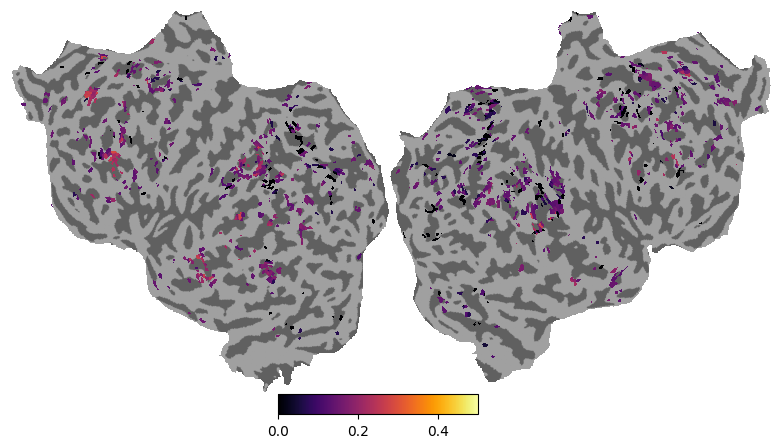

In [16]:
plot_prediction_accuracy(en_stat, surface_dict, vmin=0.0, vmax=0.5)

/mnt/antares_raid/home/bramantyos/codes/multilang_timescale/src/plot_utils.py:474: RuntimeWarning: invalid value encountered in sqrt
  pred_acc = np.sqrt(pred_acc)


Background RRGGBBAA: ffffff00
Area 0:0:2025.18:1024 exported to 2025 x 1024 pixels (96 dpi)


<Axes: >

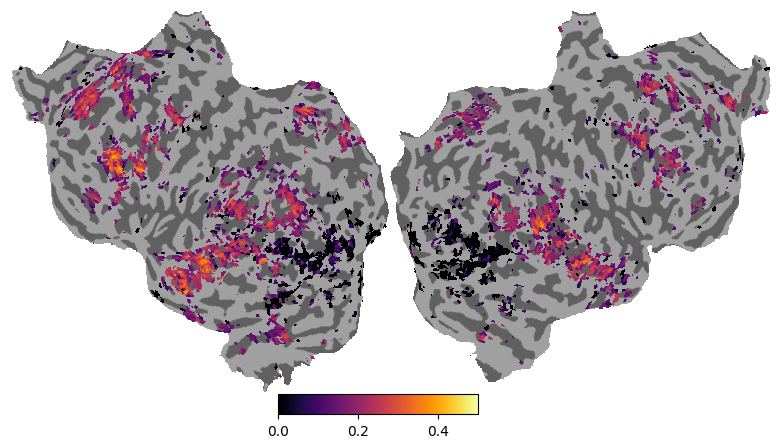

In [17]:
plot_prediction_accuracy(zh_stat, surface_dict, vmin=0.0, vmax=0.5)

# Processing Primal Weights

In [18]:
from src.utils import process_primal_weight, project_weights_to_pcs, project_weights_to_rgb

In [19]:
en_primal_weight = process_primal_weight(en_primal_weight)
zh_primal_weight = process_primal_weight(zh_primal_weight)

In [20]:
en_primal_weight_pca, en_pca = project_weights_to_pcs(en_primal_weight, n_components=100)

n_component_en = np.where(np.cumsum(en_pca.explained_variance_ratio_) > 0.9)[0][0]
print(f"Number of components that explain 90% of variance: {n_component_en}")


Number of components that explain 90% of variance: 79


In [21]:
zh_primal_weight_pca, zh_pca = project_weights_to_pcs(zh_primal_weight, n_components=100)

n_component_zh = np.where(np.cumsum(zh_pca.explained_variance_ratio_) > 0.9)[0][0]
print(f"Number of components that explain 90% of variance: {n_component_zh}")

Number of components that explain 90% of variance: 70


In [22]:
rgb_en = project_weights_to_rgb(en_primal_weight)
rgb_zh = project_weights_to_rgb(zh_primal_weight)

In [23]:
def plot_rgb_from_weight(weight_rgb:np.ndarray, surface_dict:dict):
    red = Volume(weight_rgb[:, 0], surface_dict["surface"], surface_dict["transform"])
    green = Volume(weight_rgb[:, 1], surface_dict["surface"], surface_dict["transform"])
    blue = Volume(weight_rgb[:, 2], surface_dict["surface"], surface_dict["transform"])

    vol_rgb = VolumeRGB(red, green, blue, surface_dict["surface"], surface_dict["transform"])

    quickshow(vol_rgb,
            with_curvature=True,
            with_colorbar=False,
            nanmean=True)

    plt.show()

Background RRGGBBAA: ffffff00
Area 0:0:2025.18:1024 exported to 2025 x 1024 pixels (96 dpi)


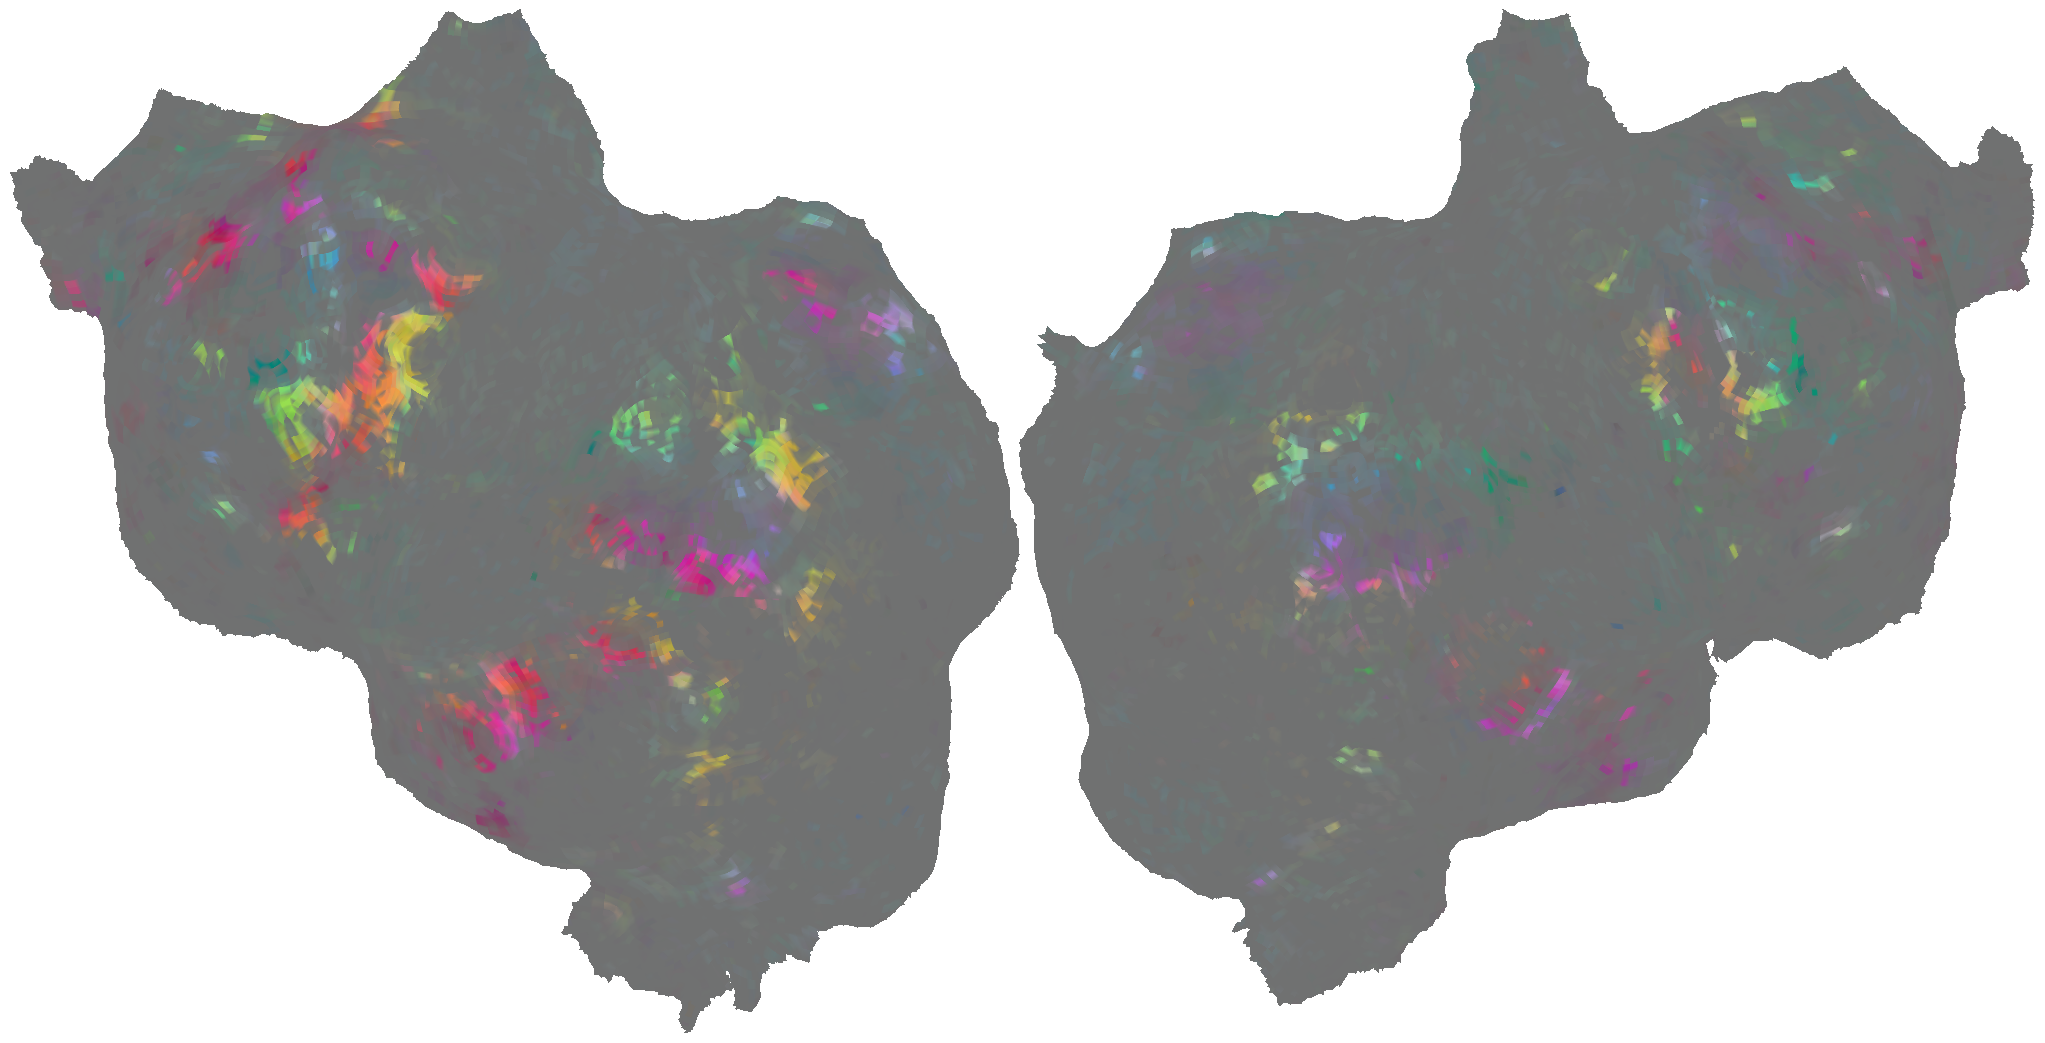

In [24]:
plot_rgb_from_weight(rgb_en, surface_dict)

Background RRGGBBAA: ffffff00
Area 0:0:2025.18:1024 exported to 2025 x 1024 pixels (96 dpi)


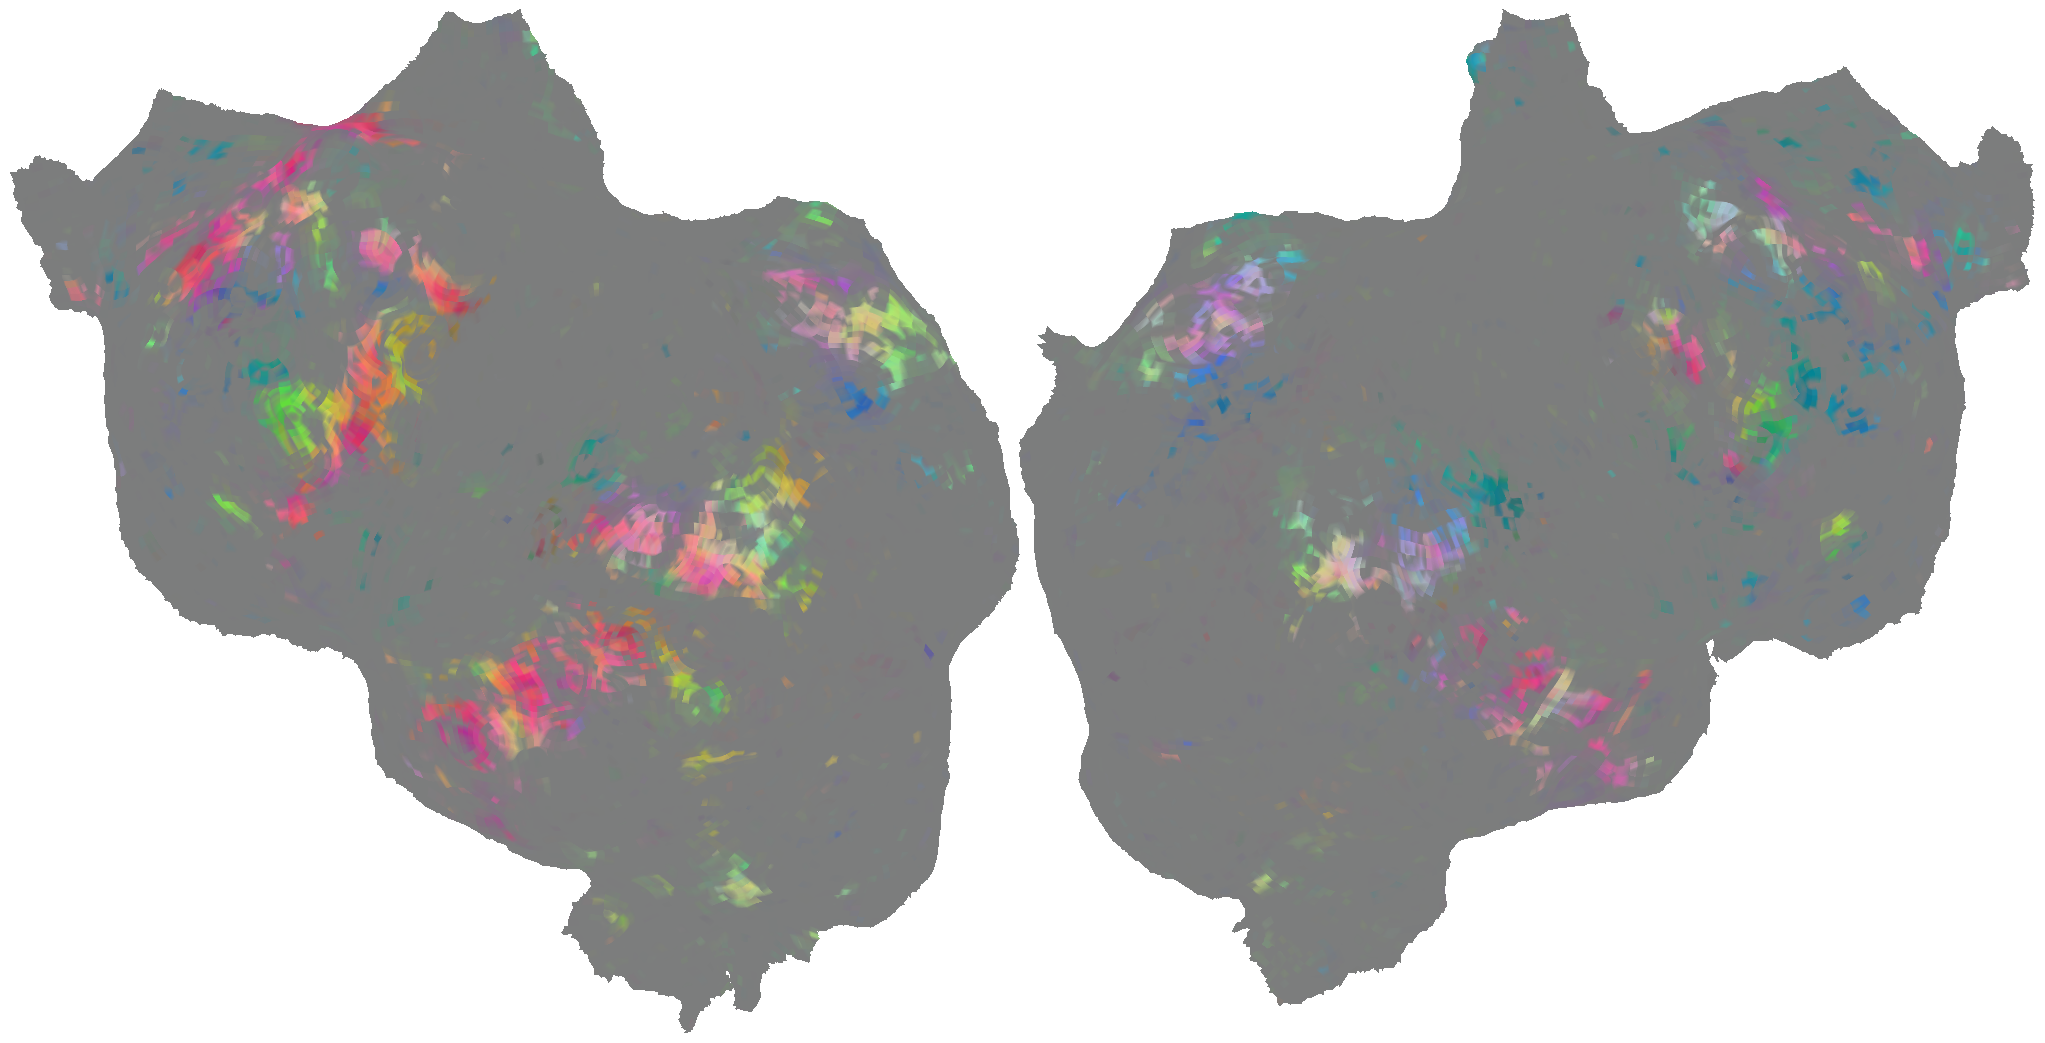

In [25]:
plot_rgb_from_weight(rgb_zh, surface_dict)

# Do clustering

In [26]:
n_comp= n_component_en if n_component_en < n_component_zh else n_component_zh
# fit pca for each language
en_pca = project_weights_to_pcs(en_primal_weight, n_components=n_comp)[0]
zh_pca = project_weights_to_pcs(zh_primal_weight, n_components=n_comp)[0]

In [27]:
# do clustering
from sklearn.cluster import KMeans

In [28]:
def kmeans_clustering(weights: np.ndarray, n_clusters: int=7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(weights)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return labels, centers

In [29]:
# find best number of cluster using silhouette score
from sklearn.metrics import silhouette_score

def find_best_cluster(weights: np.ndarray, max_cluster: int=10):
    scores = []
    for i in range(2, max_cluster):
        labels, centers = kmeans_clustering(weights, n_clusters=i)
        score = silhouette_score(weights, labels)
        scores.append(score)
    
    return scores

In [30]:
# scores_en = find_best_cluster(en_pca, max_cluster=10)
# n_cluster_en = np.argmax(scores_en) + 2

# scores_zh = find_best_cluster(zh_pca, max_cluster=10)
# n_cluster_zh = np.argmax(scores_zh) + 2

# n_clusters = n_cluster_en if n_cluster_en < n_cluster_zh else n_cluster_zh

n_clusters = 4

In [31]:
en_labels, en_centers = kmeans_clustering(en_pca, n_clusters=n_clusters)
zh_labels, zh_centers = kmeans_clustering(zh_pca, n_clusters=n_clusters)

/mnt/antares_raid/home/bramantyos/miniconda3/envs/vem/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/mnt/antares_raid/home/bramantyos/miniconda3/envs/vem/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
# # rearange labels so that the cluster with the biggest number of data is the first cluster
# from collections import Counter

# def rearrange_labels(labels: np.ndarray):
#     counter = Counter(labels)
#     max_cluster = counter.most_common(1)[0][0]
    
#     new_labels = np.zeros_like(labels)
#     for i, center in enumerate(centers):
#         new_labels[labels == center] = i
    
#     new_centers = centers.copy()    
#     return new_labels, new_centers

#     return new_labels

In [33]:
# # rearrange label
# en_labels = rearrange_labels

In [34]:
# plot label on flatmap
def plot_label_on_flatmap(labels: np.ndarray, surface_dict: dict, cmap: str="Set1"):
    vmin = labels.min()
    vmax = labels.max()
    label_vol = Volume(labels, surface_dict["surface"], surface_dict["transform"], cmap=cmap, vmin=vmin, vmax=vmax)
    quickshow(label_vol, with_curvature=True, with_colorbar=True, nanmean=True)
    plt.show()

Background RRGGBBAA: ffffff00
Area 0:0:2025.18:1024 exported to 2025 x 1024 pixels (96 dpi)


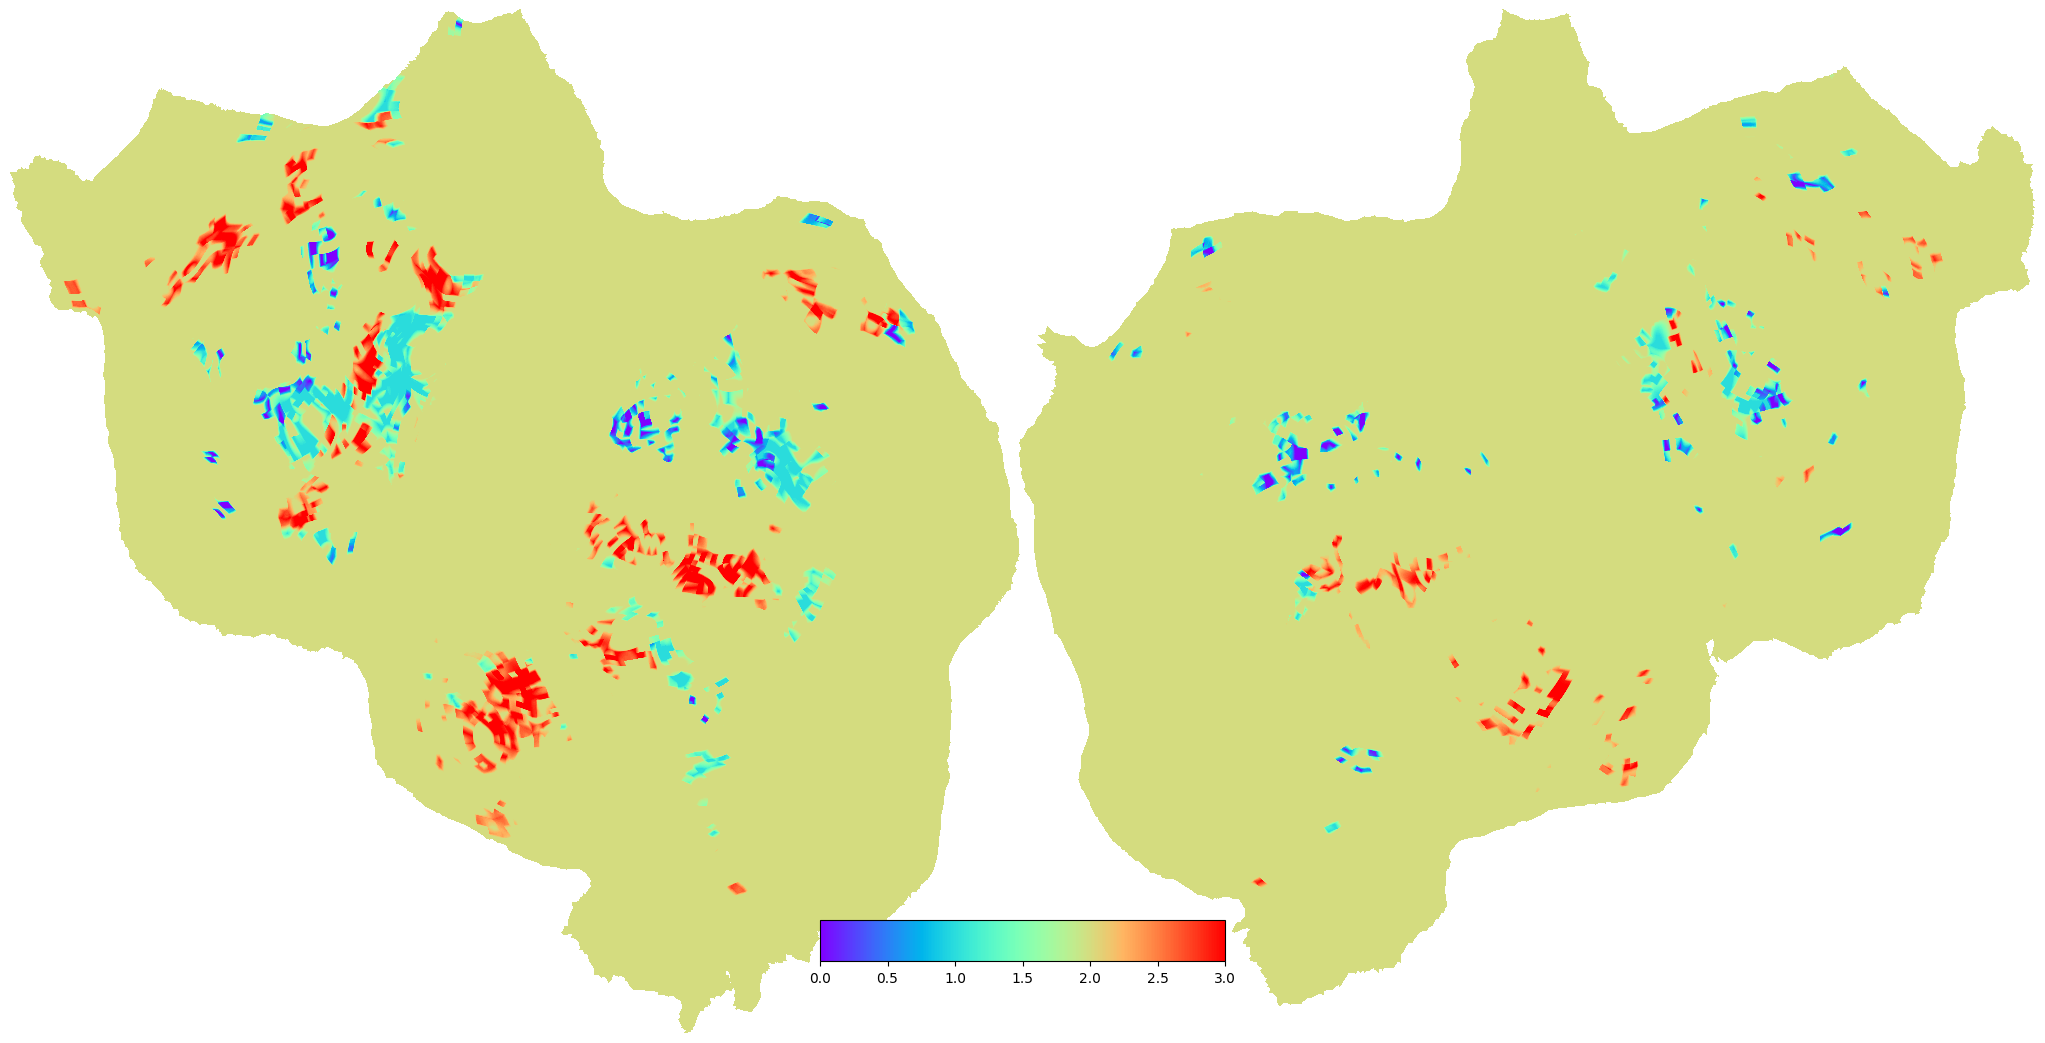

In [35]:
plot_label_on_flatmap(en_labels, surface_dict, cmap='rainbow')

Background RRGGBBAA: ffffff00
Area 0:0:2025.18:1024 exported to 2025 x 1024 pixels (96 dpi)


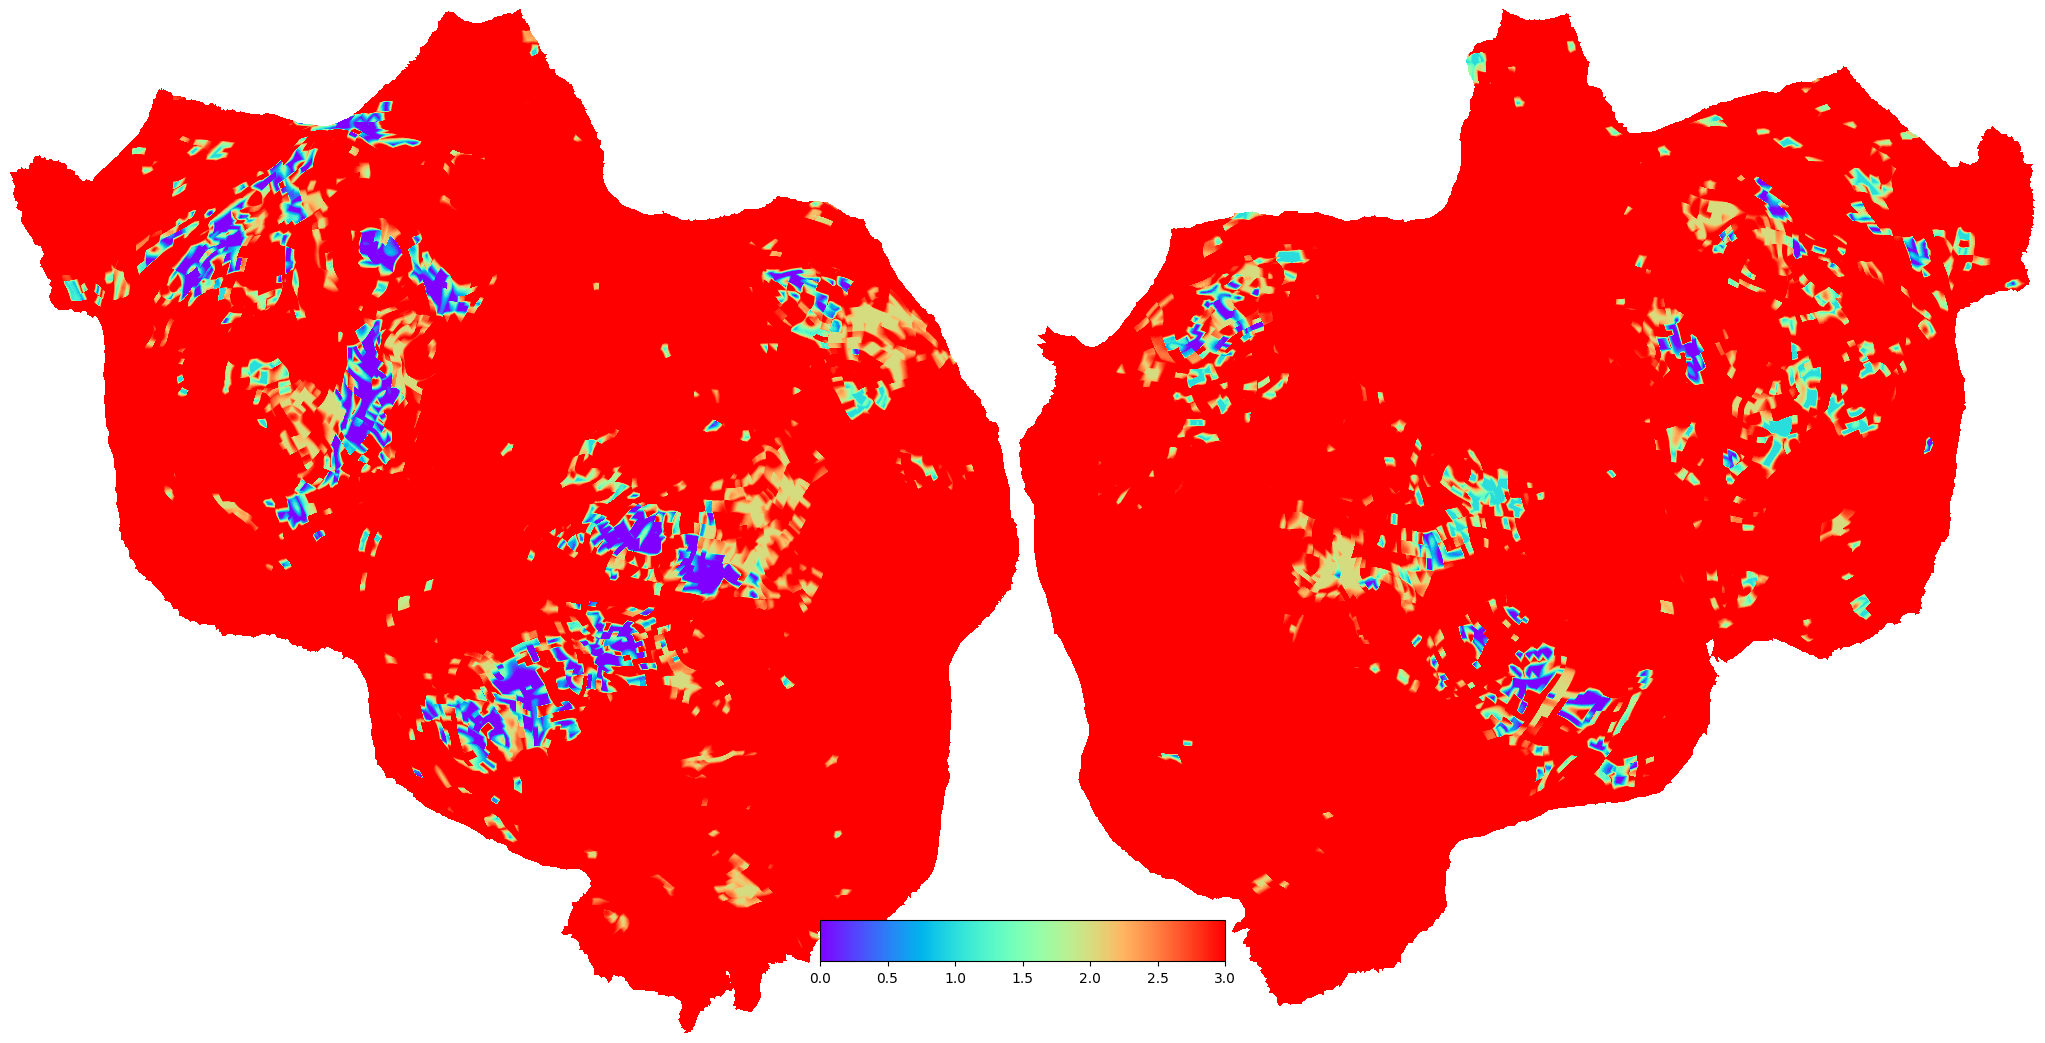

In [36]:
plot_label_on_flatmap(zh_labels, surface_dict, cmap='rainbow')

In [37]:
label_dir = f".temp/semantic_cluster/{subject_id}"

if not os.path.exists(label_dir):
    os.makedirs(label_dir)

label_idx_en = {}
label_idx_zh = {}
for i in range(n_clusters):
    label_idx_en[str(i)] = np.where(en_labels == i)[0]
    label_idx_zh[str(i)] = np.where(zh_labels == i)[0]
    

# save labels
en_label_path = os.path.join(label_dir, f"{n_clusters}_en_labels.npz")
zh_label_path = os.path.join(label_dir, f"{n_clusters}_zh_labels.npz")

# save
np.savez(en_label_path, **label_idx_en)
np.savez(zh_label_path, **label_idx_zh)


# Timescale selectivity on Semantic Cluster

In [38]:
trainer_en_file = (
    f".temp/config/bling/train/stepwise/{subject_id.lower()}_en_timescale.json"
)
trainer_zh_file = (
    f".temp/config/bling/train/stepwise/{subject_id.lower()}_zh_timescale.json"
)

feature_file_en = f".temp/config/bling/feature/{subject_id}/mBERT_all_untrimmed_timescale_stepwise_en.json"
feature_file_zh = f".temp/config/bling/feature/{subject_id}/mBERT_all_untrimmed_timescale_stepwise_zh.json"

In [39]:
en_meta_df = read_result_meta(
    result_meta_dir,
    trainer_setting_path=trainer_en_file,
    subject_setting_path=subject_file_en,
    feature_setting_path=feature_file_en,
)
zh_meta_df = read_result_meta(
    result_meta_dir,
    trainer_setting_path=trainer_zh_file,
    subject_setting_path=subject_file_zh,
    feature_setting_path=feature_file_zh,
)

en_config = en_meta_df.iloc[0].to_dict()
zh_config = zh_meta_df.iloc[0].to_dict()

en_stats = np.load(en_config["stats_path"])
zh_stats = np.load(zh_config["stats_path"])

In [40]:
keyword = f"test_{result_metric}_selectivity_mask"
p_val_keyword = f"test_p_values_{result_metric}_mask"

timescale_en, valid_timescale_voxel = put_values_on_mask(
    en_stats[keyword],
    zh_stats[p_val_keyword],
    ev_mask=None,
    alpha=alpha,
    valid_range=(8, 256),
)

timescale_zh, valid_timescale_voxel = put_values_on_mask(
    zh_stats[keyword],
    zh_stats[p_val_keyword],
    ev_mask=None,
    alpha=alpha,
    valid_range=(8, 256),
)

In [41]:
def plot_histogram_for_each_cluster(timescale: np.ndarray, labels: dict):
    n_clusters = len(labels.keys())

    fig, axs = plt.subplots(n_clusters, 1, figsize=(10, 10), sharex=True, sharey=True)
    
    for i in range(n_clusters):
        cluster_idx = labels[str(i)]
        cluster_timescale = timescale[cluster_idx]
        # drop nan
        cluster_timescale = cluster_timescale[~np.isnan(cluster_timescale)]
        
        sns.kdeplot(cluster_timescale, ax=axs[i], fill=True)   
        axs[i].set_title(f"Cluster {i}")
        axs[i].set_xlim(8, 256)
    
        axs[i].set_xlabel("Timescale")
        axs[i].set_ylabel("Density")
    
    plt.tight_layout()    
    plt.show()
    

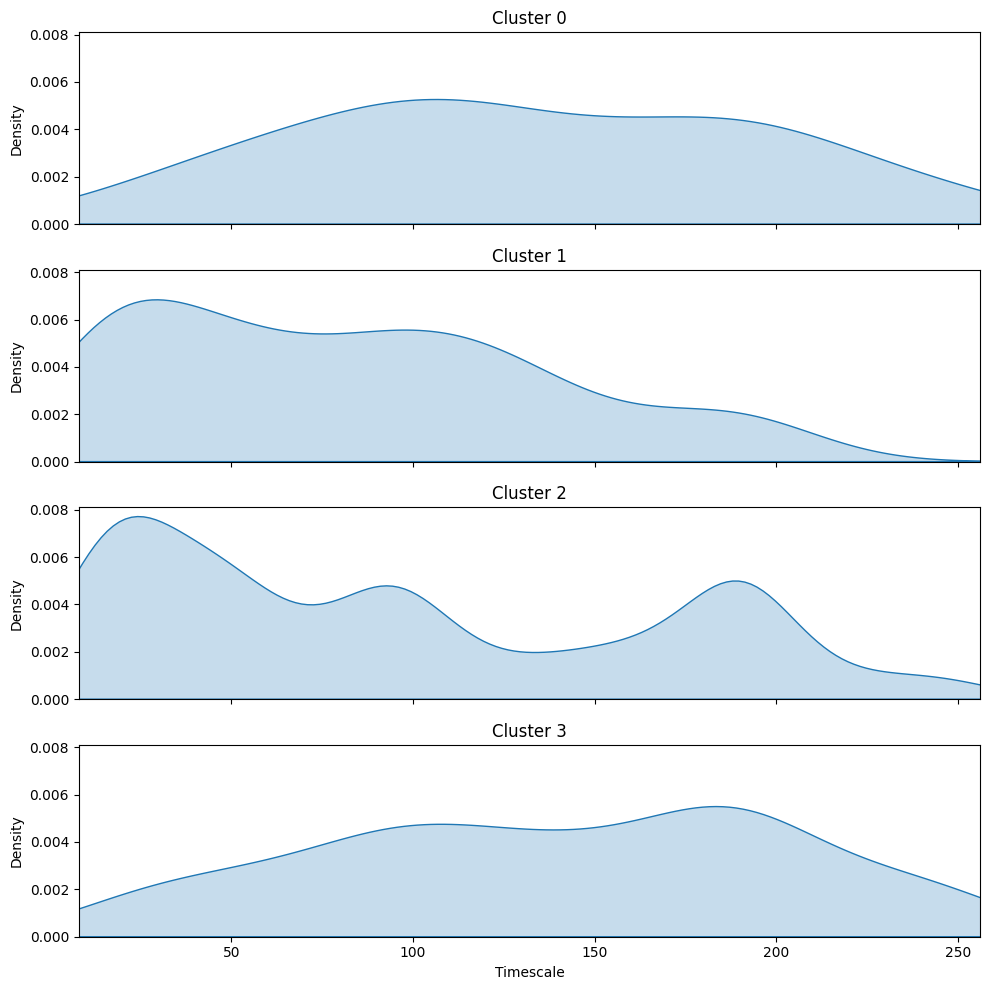

In [42]:
plot_histogram_for_each_cluster(timescale_en, label_idx_en)

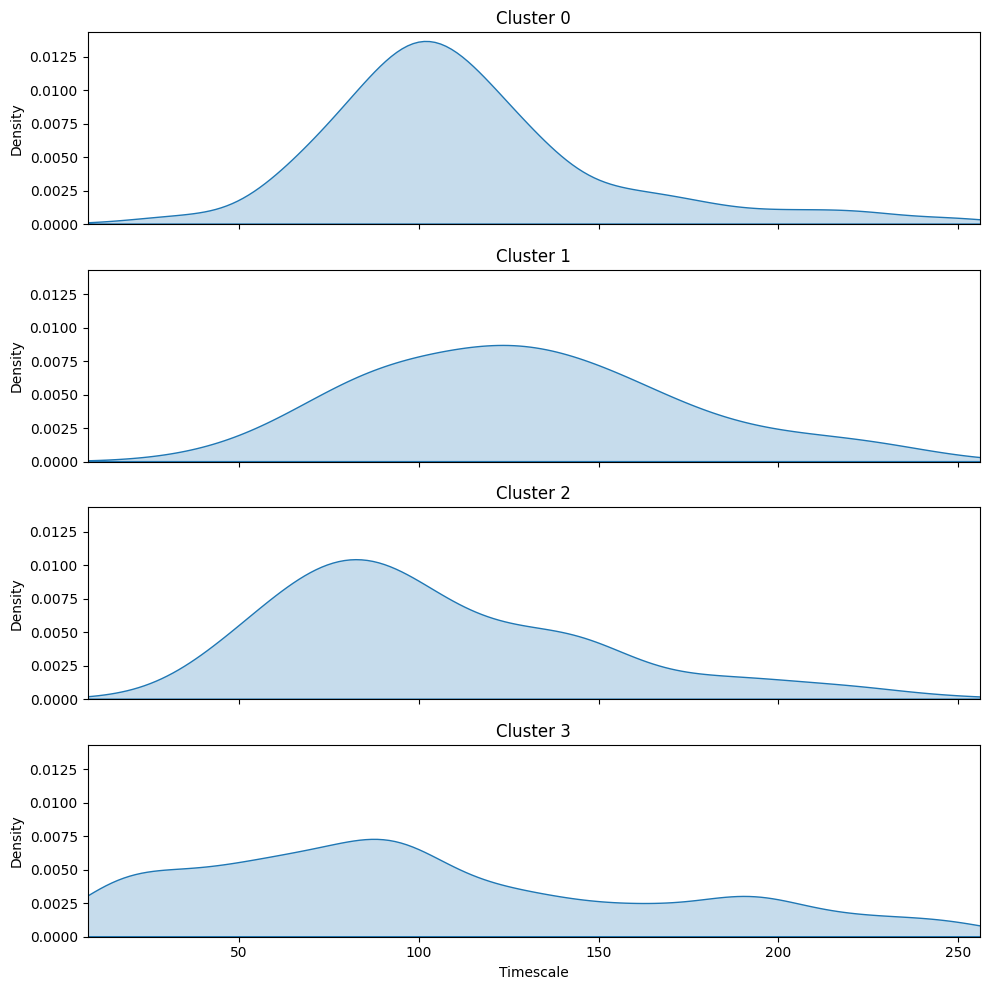

In [43]:
plot_histogram_for_each_cluster(timescale_zh, label_idx_zh)